In [15]:
import numpy as np
import os
import math
import copy
import cv2
import random
random.seed(1)

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

In [17]:
img1 = cv2.imread("/Users/shixiangyang/Desktop/wuziqi.jpg")

CPU times: user 71.8 ms, sys: 4.64 ms, total: 76.4 ms
Wall time: 74.7 ms


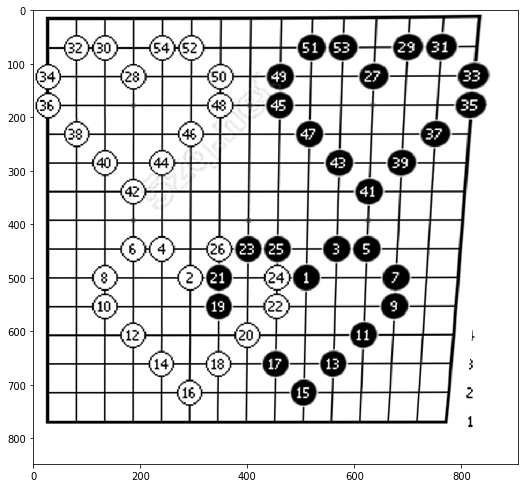

In [29]:
%%time
fig = plt.figure()
fig.set_size_inches(40,20)

i1 = fig.add_subplot(141)
i1.imshow(img1)


In [41]:

class wuziqi_ana:
    def __init__(self,inputimg = None):
        self.img = cv2.imread(inputimg)
        self.grap = None
        self.edge = None
        
    def preprocess(self):
        '''
        预处理 二值化图像 降噪 模糊 强化边缘
        '''
        img1= copy.deepcopy(self.img)
        gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
        # 灰度图
        self.gray=cv2.GaussianBlur(gray, (5, 5), 0) 
        # 高斯模糊
        self.edge=cv2.Canny(self.gray,60,220)
        # 查找边缘
        ret, binary = cv2.threshold(self.edge,200,255,cv2.THRESH_BINARY) 
        # 二值化
        binary, contours, hierarchy = cv2.findContours(binary,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)  

        fig = plt.figure()
        fig.set_size_inches(40,20)

        i1 = fig.add_subplot(141)
        i1.imshow(self.gray)
        i2 = fig.add_subplot(142)
        i2.imshow(self.edge)
        i3 = fig.add_subplot(143)
        i3.imshow(binary)
    
    
    def straightLineDetection(self):
        '''
        直线检测 发现其中的行和列
        '''
        img0 = copy.deepcopy(self.img)

        # Convert the img to grayscale
        gray = cv2.cvtColor(img0,cv2.COLOR_BGR2GRAY)

        # Apply edge detection method on the image
        edges = cv2.Canny(gray,20,220,apertureSize = 3)

        # This returns an array of r and theta values
        lines = cv2.HoughLines(edges,1,np.pi/180, 200)

        if len(lines)!=0:#(lines)!=None:

            for r,theta in lines[:,0,:]:

                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a*r
                y0 = b*r
                x1 = int(x0 + 1000*(-b))
                y1 = int(y0 + 1000*(a))
                x2 = int(x0 - 1000*(-b))
                y2 = int(y0 - 1000*(a))
                cv2.line(img0,(x1,y1), (x2,y2), (0,0,255),2)
        #     display(lines[:,0,:])
            self.lines = copy.deepcopy(lines[:,0,:])
            plt.imshow(img0);
            
    def straightLineTrim(self):
        '''
        删除多余的直线（很多斜向的直线）
        '''
        raise NotImpletementedError
        
    def trans_form(self):
        '''
        按照检测到图像的斜率 使得扭曲的棋盘还原成正方形
        '''
        raise NotImpletementedError
    
    def cut_chessboard(self):
        '''
        按照统计出的经线纬线的数量切分棋盘到每一格
        '''
        self.chessboardImg = []
        raise NotImpletementedError
        
    def analysize(self):
        '''
        按照每一个切分出的小格子 判断出每个点是否有子 有什么样的子
        '''
        imgs = deepcopy.copy(self.chessboardImg)
        self.chessboard = []
        raise NotImpletementedError
        
    def countWhoWin(self):
        '''
        在给定的面板中依次统计是否有横竖斜连着的五个子
        '''
        raise NotImpletementedError

In [42]:
inputimg = "/Users/shixiangyang/Desktop/wuziqi.jpg"

In [43]:
wuziqi = wuziqi_ana(inputimg)

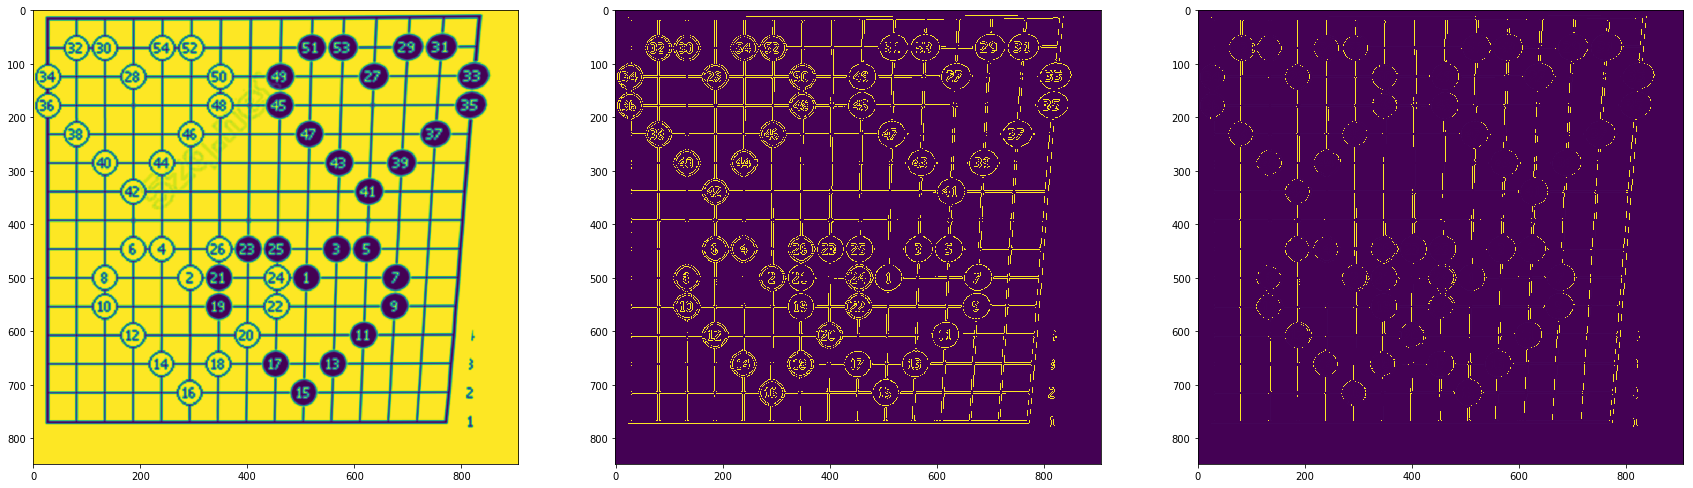

In [44]:
wuziqi.preprocess()

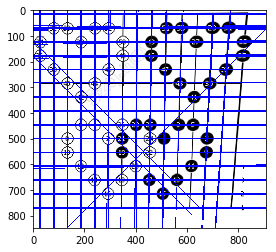

In [40]:
wuziqi.straightLineDetection()

In [ ]:
wuziqi.straightLineDetection()

In [ ]:
wuziqi.trans_form()

In [ ]:
wuziqi.cut_chessboard()

In [ ]:
wuziqi.analysize()

In [ ]:
wuziqi.countWhoWin()